In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%autosave 60

Autosaving every 60 seconds


# DSCI 235 Final Project
Data Source: https://github.com/shahinrostami/pokemon_dataset/blob/master/pokemon_gen_1_to_8.csv \
Github: https://github.com/damocardenas/DSCI235-Final

## Project Description
The video game of Pokemon is a video game about collecting and battling fictional creatures known as Pokemon. These video games have been coming out every few years since 1996 and with each entry into this beloved franchise comes a new generation of pokemon to catch and battle. With 8 generations out and 9th generation being announced, I began to wonder how diverse each pokemon generation is? In the world of Pokemon, each Pokemon has a type associated with it, and these types range from Water to Ghost to Fairy. In the datatset I have selected, it details all 908 pokemon from all 8 generations since the first game. Each pokemon in this dataset contains a pokedex number, the games have a type of encyclopedia for every pokemon, the type(s) it is, species, how effective it is against other typings and much more.

With all this information from the dataset I plan to answer the following questions in this notebook.

1. How many types are there for each generation of Pokemon?
    * How many Pokemon have dual typing (Pokemon with 2 typings) are there?
2. Understand how these Pokemon types change with each generation?
    * What type had the biggest increase in each generation?
3. What Pokemon type is the most common in each generation and overall?

## Reading Data
I will start by getting the data from the source into the notebook so I can start seperating it, analyzing it and make my report

In [2]:
pokemon_dataset = pd.read_csv("https://raw.githubusercontent.com/shahinrostami/pokemon_dataset/master/pokemon_gen_1_to_8.csv")
pokemon_dataset

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


## Cleaning Data
Now that the data is imported and part of the notebook, I can now start manipulating it. I will first start by cleaning it up. There is a lot of columns with information that will not be useful for what I aim to analyze.

I will start by getting rid of unnecessary columns such as german_name, and effectiveness against the different typings.

In [3]:
pokemon = pokemon_dataset.loc[:, 'pokedex_number':'type_2'].drop(
    columns=['german_name', 'japanese_name', 'status', 'species'])
pokemon.head()

,pokedex_number,name,generation,type_number,type_1,type_2
0,1,Bulbasaur,1,2,Grass,Poison
1,2,Ivysaur,1,2,Grass,Poison
2,3,Venusaur,1,2,Grass,Poison
3,3,Mega Venusaur,1,2,Grass,Poison
4,4,Charmander,1,1,Fire,NaN


Now that we cleaned up the data to only include information we need. We can now seperate the data into different dataframes for each generation and use the one we currently have as all pokemon from every generation. In told there is 8 generations of pokemon, so we will seperate the pokemon into 8 dataframes.

In [4]:
gen1 = pokemon.loc[pokemon['generation'] == 1]
gen2 = pokemon.loc[pokemon['generation'] == 2]
gen3 = pokemon.loc[pokemon['generation'] == 3]
gen4 = pokemon.loc[pokemon['generation'] == 4]
gen5 = pokemon.loc[pokemon['generation'] == 5]
gen6 = pokemon.loc[pokemon['generation'] == 6]
gen7 = pokemon.loc[pokemon['generation'] == 7]
gen8 = pokemon.loc[pokemon['generation'] == 8]

type_colors=['#A8B820', #BUG
             '#000000', #DARK
             '#7038F8', #DRAGON
             '#F8D030', #ELECTRIC
             '#EE99AC', #FAIRY
             '#C03028', #FIGHTING
             '#F08030', #FIRE
             '#2F60B5', #FLYING
             '#705898', #GHOST
             '#78C850', #GRASS
             '#E0C068', #GROUND
             '#98D8D8', #ICE
             '#A8A878', #NORMAL
             '#A040A0', #POISON
             '#F85888', #PSYCHIC
             '#B8A038', #ROCK
             '#9399A5', #STEEL5
             '#6890F0', #WATER
            ]

Now I will begin to count the total types in each generation. I will be adding both type 1 and type 2, if there is a second type assoicated with Pokemon. With this addition however, I need to use fill_value=0 to make sure that NAN(not a number) does not interferes with the addition. When I use this fill_value=0, it transforms each NAN into a 0 rather than a NAN, this helps ensure the addition is done correctly. The reason why NAN's appear in the dataset is because not every Pokemon has a second type and if it does not have a second type, it appears as NAN.

In [5]:
typing1 = gen1['type_1'].value_counts().add(gen1['type_2'].value_counts(), fill_value=0)
typing2 = gen2['type_1'].value_counts().add(gen2['type_2'].value_counts(), fill_value=0)
typing3 = gen3['type_1'].value_counts().add(gen3['type_2'].value_counts(), fill_value=0)
typing4 = gen4['type_1'].value_counts().add(gen4['type_2'].value_counts(), fill_value=0)
typing5 = gen5['type_1'].value_counts().add(gen5['type_2'].value_counts(), fill_value=0)
typing6 = gen6['type_1'].value_counts().add(gen6['type_2'].value_counts(), fill_value=0)
typing7 = gen7['type_1'].value_counts().add(gen7['type_2'].value_counts(), fill_value=0)
typing8 = gen8['type_1'].value_counts().add(gen8['type_2'].value_counts(), fill_value=0)

## 1. How Many Types are there for Each Generation?

The first question I seek to answer is how many types are there for every generation. Many of the Pokemon have dual typing, and for those Pokemon I will count them towards both types they represent. To achieve the answer for this question, I will put every generation into a bar graph to see how the different types look compared to each other.

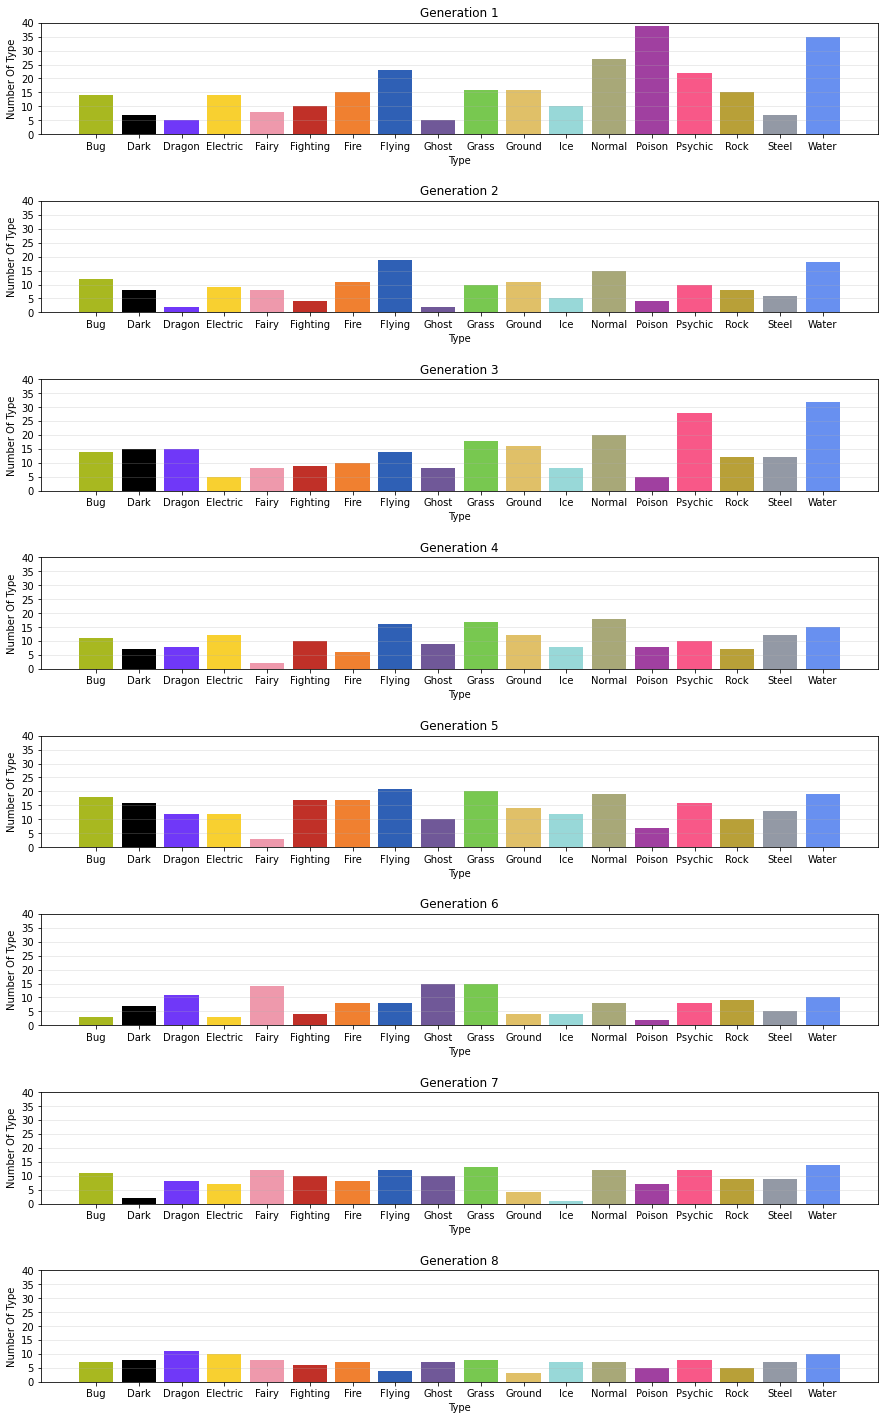

In [6]:
plt.figure(figsize=(15,25))
plt.subplots_adjust(hspace=0.6)

#Gen1
plt.subplot(8, 1, 1), plt.ylim(0,40), plt.yticks(range(0, 41, 5))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 1")
plt.grid(axis = 'y', alpha=0.3)
plt.bar(typing1.index, typing1, color=type_colors)

#Gen2
plt.subplot(8, 1, 2), plt.ylim(0,40), plt.yticks(range(0, 41, 5))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 2")
plt.grid(axis = 'y', alpha=0.3)
plt.bar(typing2.index, typing2, color=type_colors)

#Gen3
plt.subplot(8, 1, 3), plt.ylim(0,40), plt.yticks(range(0, 41, 5))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 3")
plt.grid(axis = 'y', alpha=0.3)
plt.bar(typing3.index, typing3, color=type_colors)

#Gen4
plt.subplot(8, 1, 4), plt.ylim(0,40), plt.yticks(range(0, 41, 5))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 4")
plt.grid(axis = 'y', alpha=0.3)
plt.bar(typing4.index, typing4, color=type_colors)

#Gen5
plt.subplot(8, 1, 5), plt.ylim(0,40), plt.yticks(range(0, 41, 5))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 5")
plt.grid(axis = 'y', alpha=0.3)
plt.bar(typing5.index, typing5, color=type_colors)

#Gen6
plt.subplot(8, 1, 6), plt.ylim(0,40), plt.yticks(range(0, 41, 5))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 6")
plt.grid(axis = 'y', alpha=0.3)
plt.bar(typing6.index, typing6, color=type_colors)

#Gen7
plt.subplot(8, 1, 7), plt.ylim(0,40), plt.yticks(range(0, 41, 5))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 7")
plt.grid(axis = 'y', alpha=0.3)
plt.bar(typing7.index, typing7, color=type_colors)

#Gen8
plt.subplot(8, 1, 8), plt.ylim(0,40), plt.yticks(range(0, 41, 5))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 8")
plt.grid(axis = 'y', alpha=0.3)
plt.bar(typing8.index, typing8, color=type_colors);

### Outcome of 1:
As you can see in the 8 bar graphs above, there is a lot going on within each generation. The biggest observation that could be made is that all the generations have different number of Pokemon made in each type. Some types have more or less Pokemon made in a given generation. Another observation is that each generation has a graph very similar to another generation. This is very interesting as it seems like some generations add a dense amount of a certain type and others add a very spread out amount to each type.

* **How many types are there for each generation?** The average for every generation is around 20 for each type. A couple generations have more or less than that for a given type, like generation 1 which has around 40 Poison types or like generation 7 which has around 3 Ice types. Beside these extremes there is around 20 Pokemon per type and 18 types, so roughly around 360 Pokemon per generation.

Some other observations:
* **The first and third Generation contain the most concentrated types.** The first and third generation are the only generations to have Pokemon types that reach well over 20. Poison, Psychic, and Water are the types that reached a high of 30 to 40. This is especially interesting as these are very early in Pokemon's creation and every generation after the third kept the type counts at around 20. 


* **The average popular type in every generation is Water.** In every generation, Water appears to be the generation that is added the most. Overall Water is always within the top 3 or 4 when it comes to type that had the most Pokemon added.


* **The eighth generation has the most Pokemon types evenly spread.** The eighth generation of Pokemon has the most spread of Pokemon types. There is fewer Pokemon added overall, but there is no type that got more or less than the rest. Dragon, Electric, and Water are the types that got the most around 10, but there is a smaller difference between that and Ground that got around 5. This is especially present when compared to other generations like generation 3 that had over 25 psychic Pokemon and around 5 Electric.

### 1a. Dual Typing in Each Generation
Dual typing is when a Pokemon has more than just one type associated with them. To calculate this, I will need find the number of dual types in each generation. But before I can find that, I need to swift through to find just Pokemon with dual typing. After I grab only the dual typing Pokemon in each generation, I will put the findings into a line chart to show the increase or decrease of dual typing in each Generation.

In [7]:
gen = ['gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8']
count_dual = [gen1[gen1['type_number'] == 2]['name'].count(),
         gen2[gen2['type_number'] == 2]['name'].count(),
         gen3[gen3['type_number'] == 2]['name'].count(),
         gen4[gen4['type_number'] == 2]['name'].count(),
         gen5[gen5['type_number'] == 2]['name'].count(),
         gen6[gen6['type_number'] == 2]['name'].count(),
         gen7[gen7['type_number'] == 2]['name'].count(),
         gen8[gen8['type_number'] == 2]['name'].count()]

dual_types = pd.DataFrame({'Generation':gen, 'Count':count_dual})
dual_types

,Generation,Count
0,gen1,96
1,gen2,55
2,gen3,84
3,gen4,67
4,gen5,85
5,gen6,53
6,gen7,62
7,gen8,40


([<matplotlib.lines.Line2D at 0x20a3c0f8bb0>], Text(0.5, 1.0, 'Dual Types'))

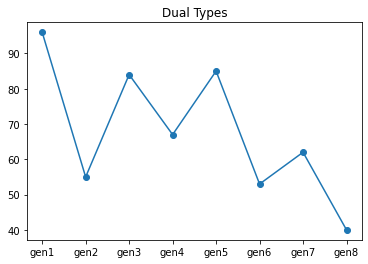

In [8]:
plt.figure()

plt.plot(dual_types['Generation'], dual_types['Count'], 'o-'), plt.title("Dual Types")

### Outcome of 1a:
As you can see the number of dual typing is all over the place for each generation of Pokemon. The first, third and fifth generation all increased the number of dual types; which implies that the second, fourth, sixth, seventh and eighth generation all decrease the number of dual types. The generation to have the lowest dual types is the eighth generation and the generation with the highest is the first. With this information, I believe there is a claim that can be made that the earlier generation had more dual type Pokemon as compared to the later generation.

## 2. How Types Have Changed in Each Generation
As we have seen in the previous questions, the generations have a different number of Pokemon made for each type. A generation could have any number of Pokemon made for any of the types. With this in mind, it will helps us get started in the next question I want to know about Pokemon.

The question I hope to answer is understand how types have changed in each generation of Pokemon.

To answer this question, I first need to create all new dataframes for each type there is. There is 18 types and so I need to create 18 dataframes, each with the generation and amount of Pokemon associated with that type. Once I have all 18 dataframes, I will then create line charts that shows how the types have changed over different generations.

With these line charts, I will be able to see differences between a certain type and generations. I could see how Water or Bug has changed overtime and see if the line is mostly increasing or decreasing.

In [9]:
gen = ['gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8']
count_bug = [typing1['Bug'], typing2['Bug'],
             typing3['Bug'], typing4['Bug'],
             typing5['Bug'], typing6['Bug'],
             typing7['Bug'], typing8['Bug']]
bug = pd.DataFrame({'Generation':gen, 'Count':count_bug})

count_dark = [typing1['Dark'], typing2['Dark'],
             typing3['Dark'], typing4['Dark'],
             typing5['Dark'], typing6['Dark'],
             typing7['Dark'], typing8['Dark']]
dark = pd.DataFrame({'Generation':gen, 'Count':count_dark})

count_dragon = [typing1['Dragon'], typing2['Dragon'],
             typing3['Dragon'], typing4['Dragon'],
             typing5['Dragon'], typing6['Dragon'],
             typing7['Dragon'], typing8['Dragon']]
dragon = pd.DataFrame({'Generation':gen, 'Count':count_dragon})

count_electric = [typing1['Electric'], typing2['Electric'],
             typing3['Electric'], typing4['Electric'],
             typing5['Electric'], typing6['Electric'],
             typing7['Electric'], typing8['Electric']]
electric = pd.DataFrame({'Generation':gen, 'Count':count_electric})

count_fairy = [typing1['Fairy'], typing2['Fairy'],
             typing3['Fairy'], typing4['Fairy'],
             typing5['Fairy'], typing6['Fairy'],
             typing7['Fairy'], typing8['Fairy']]
fairy = pd.DataFrame({'Generation':gen, 'Count':count_fairy})

count_fighting = [typing1['Fighting'], typing2['Fighting'],
             typing3['Fighting'], typing4['Fighting'],
             typing5['Fighting'], typing6['Fighting'],
             typing7['Fighting'], typing8['Fighting']]
fighting = pd.DataFrame({'Generation':gen, 'Count':count_fighting})

count_fire = [typing1['Fire'], typing2['Fire'],
             typing3['Fire'], typing4['Fire'],
             typing5['Fire'], typing6['Fire'],
             typing7['Fire'], typing8['Fire']]
fire = pd.DataFrame({'Generation':gen, 'Count':count_fire})

count_flying = [typing1['Flying'], typing2['Flying'],
             typing3['Flying'], typing4['Flying'],
             typing5['Flying'], typing6['Flying'],
             typing7['Flying'], typing8['Flying']]
flying = pd.DataFrame({'Generation':gen, 'Count':count_flying})

count_ghost = [typing1['Ghost'], typing2['Ghost'],
             typing3['Ghost'], typing4['Ghost'],
             typing5['Ghost'], typing6['Ghost'],
             typing7['Ghost'], typing8['Ghost']]
ghost = pd.DataFrame({'Generation':gen, 'Count':count_ghost})

count_grass = [typing1['Grass'], typing2['Grass'],
             typing3['Grass'], typing4['Grass'],
             typing5['Grass'], typing6['Grass'],
             typing7['Grass'], typing8['Grass']]
grass = pd.DataFrame({'Generation':gen, 'Count':count_grass})

count_ground = [typing1['Ground'], typing2['Ground'],
             typing3['Ground'], typing4['Ground'],
             typing5['Ground'], typing6['Ground'],
             typing7['Ground'], typing8['Ground']]
ground = pd.DataFrame({'Generation':gen, 'Count':count_ground})

count_ice = [typing1['Ice'], typing2['Ice'],
             typing3['Ice'], typing4['Ice'],
             typing5['Ice'], typing6['Ice'],
             typing7['Ice'], typing8['Ice']]
ice = pd.DataFrame({'Generation':gen, 'Count':count_ice})

count_normal = [typing1['Normal'], typing2['Normal'],
             typing3['Normal'], typing4['Normal'],
             typing5['Normal'], typing6['Normal'],
             typing7['Normal'], typing8['Normal']]
normal = pd.DataFrame({'Generation':gen, 'Count':count_normal})

count_poison = [typing1['Poison'], typing2['Poison'],
             typing3['Poison'], typing4['Poison'],
             typing5['Poison'], typing6['Poison'],
             typing7['Poison'], typing8['Poison']]
poison = pd.DataFrame({'Generation':gen, 'Count':count_poison})

count_psychic = [typing1['Psychic'], typing2['Psychic'],
             typing3['Psychic'], typing4['Psychic'],
             typing5['Psychic'], typing6['Psychic'],
             typing7['Psychic'], typing8['Psychic']]
psychic = pd.DataFrame({'Generation':gen, 'Count':count_psychic})

count_rock = [typing1['Rock'], typing2['Rock'],
             typing3['Rock'], typing4['Rock'],
             typing5['Rock'], typing6['Rock'],
             typing7['Rock'], typing8['Rock']]
rock = pd.DataFrame({'Generation':gen, 'Count':count_rock})

count_steel = [typing1['Steel'], typing2['Steel'],
             typing3['Steel'], typing4['Steel'],
             typing5['Steel'], typing6['Steel'],
             typing7['Steel'], typing8['Steel']]
steel = pd.DataFrame({'Generation':gen, 'Count':count_steel})

count_water = [typing1['Water'], typing2['Water'],
             typing3['Water'], typing4['Water'],
             typing5['Water'], typing6['Water'],
             typing7['Water'], typing8['Water']]
water = pd.DataFrame({'Generation':gen, 'Count':count_water})
water

,Generation,Count
0,gen1,35.0
1,gen2,18.0
2,gen3,32.0
3,gen4,15.0
4,gen5,19.0
5,gen6,10.0
6,gen7,14.0
7,gen8,10.0


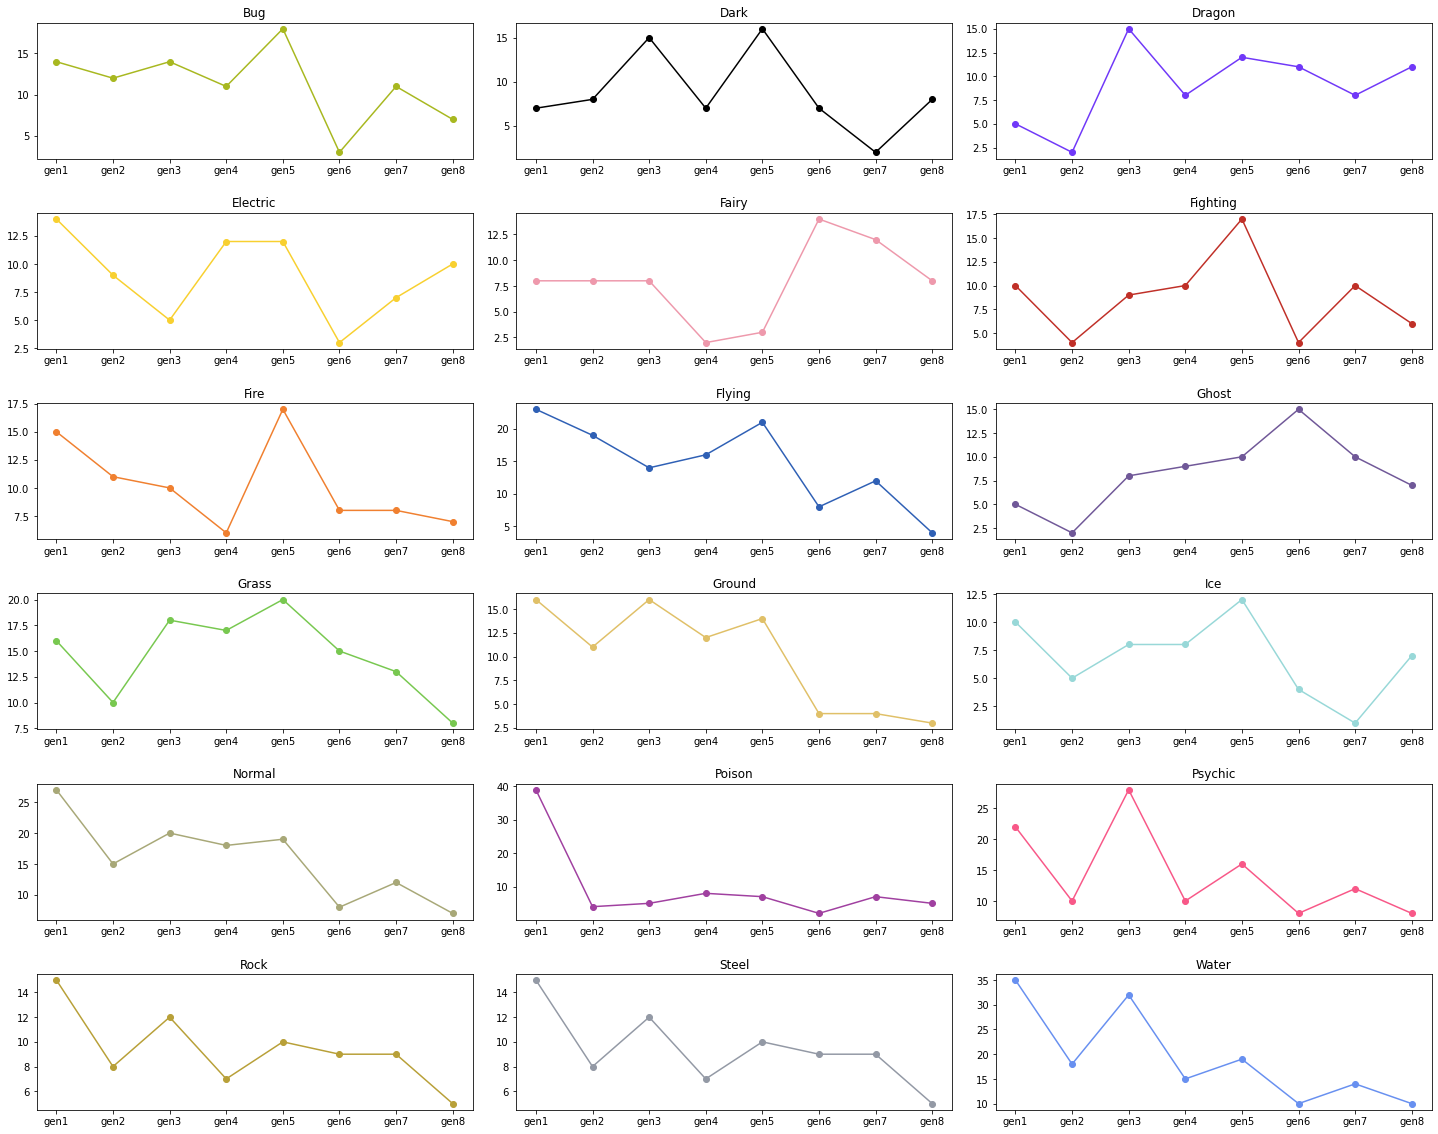

In [10]:
plt.figure(figsize=(25, 20)) #Fix Y-axis to include all numbers
plt.subplots_adjust(wspace=0.1, hspace=0.4)

#Bug
plt.subplot(6,3,1)
plt.plot(bug['Generation'], bug['Count'], 'o-', color=type_colors[0])
plt.title('Bug')

#Dark
plt.subplot(6,3,2)
plt.plot(dark['Generation'], dark['Count'], 'o-', color=type_colors[1])
plt.title('Dark')

#Dragon
plt.subplot(6,3,3)
plt.plot(dragon['Generation'], dragon['Count'], 'o-', color=type_colors[2])
plt.title('Dragon')

#Electric
plt.subplot(6,3,4)
plt.plot(bug['Generation'], electric['Count'], 'o-', color=type_colors[3])
plt.title('Electric')

#Fairy
plt.subplot(6,3,5)
plt.plot(fairy['Generation'], fairy['Count'], 'o-', color=type_colors[4])
plt.title('Fairy')

#Fighting
plt.subplot(6,3,6)
plt.plot(fighting['Generation'], fighting['Count'], 'o-', color=type_colors[5])
plt.title('Fighting')

#Fire
plt.subplot(6,3,7)
plt.plot(fire['Generation'], fire['Count'], 'o-', color=type_colors[6])
plt.title('Fire')

#Flying
plt.subplot(6,3,8)
plt.plot(flying['Generation'], flying['Count'], 'o-', color=type_colors[7])
plt.title('Flying')

#Ghost
plt.subplot(6,3,9)
plt.plot(ghost['Generation'], ghost['Count'], 'o-', color=type_colors[8])
plt.title('Ghost')

#Grass
plt.subplot(6,3,(10))
plt.plot(grass['Generation'], grass['Count'], 'o-', color=type_colors[9])
plt.title('Grass')

#Ground
plt.subplot(6,3,(11))
plt.plot(ground['Generation'], ground['Count'], 'o-', color=type_colors[10])
plt.title('Ground')

#Ice
plt.subplot(6,3,(12))
plt.plot(ice['Generation'], ice['Count'], 'o-', color=type_colors[11])
plt.title('Ice')

#Normal
plt.subplot(6,3,(13))
plt.plot(normal['Generation'], normal['Count'], 'o-', color=type_colors[12])
plt.title('Normal')

#Poison
plt.subplot(6,3,(14))
plt.plot(poison['Generation'], poison['Count'], 'o-', color=type_colors[13])
plt.title('Poison')

#Psychic
plt.subplot(6,3,(15))
plt.plot(psychic['Generation'], psychic['Count'], 'o-', color=type_colors[14])
plt.title('Psychic')

#Rock
plt.subplot(6,3,(16))
plt.plot(rock['Generation'], rock['Count'], 'o-', color=type_colors[15])
plt.title('Rock')

#Steel
plt.subplot(6,3,(17))
plt.plot(rock['Generation'], rock['Count'], 'o-', color=type_colors[16])
plt.title('Steel')

#Water
plt.subplot(6,3,(18))
plt.plot(water['Generation'], water['Count'], 'o-', color=type_colors[17])
plt.title('Water');

### Outcome of 2:
As you see, the data looks extremely organized in all these different chart. In all these charts we can see how many Pokemon there are for a given type and generation. The first observation I found once I did this is that the lines are very bumpy and almost none of them are straight. All of the types have widely changing numbers for any given generation, only a few times are there ever numbers very close consecutively. The main outlier to this observation is poison which has a very high point in generation 1, and then every iteration afterwards stays closely together. This is the only type to do this, every other type has a lot more movement.

What this tells me is that the typing is always changing inbetween these different generation of Pokemon.

Other Observation I found:
* **The type that had the biggest jumps is Psychic and Poison.** As I said previously, poison went from one of the highest Pokemon types to one of the lowest in a single generation. It started at 40 and then jumped all the way down to around 5, making it the biggest decrease between generations. Psychic on the other hand, had one of the biggest increase out of all the types. It went from 10 in generation 2 to almost 30 in generation 3. That is the biggest increase jump out of all the Pokemon.

### 2a. What Type Had The Biggest Increase Between Generations?
To figure this question out, I will be subtracting the generation after by the generation previous. By doing this I should be left with the difference between the two generations. When I then grab the maximum of these differences, I should get the type that had the biggest increase between the two generations.

After I figure all of the double generation, I will then be subtracting all the generation by each other, and then taking the maximum of that difference to find the type that had the most increase between all generations.

In [11]:
print("Biggest Increase Between Generation 1 to Generation 2 is", (typing2 - typing1).idxmax())
print("Biggest Increase Between Generation 2 to Generation 3 is", (typing3 - typing2).idxmax())
print("Biggest Increase Between Generation 3 to Generation 4 is", (typing4 - typing3).idxmax())
print("Biggest Increase Between Generation 4 to Generation 5 is", (typing5 - typing4).idxmax())
print("Biggest Increase Between Generation 5 to Generation 6 is", (typing6 - typing5).idxmax())
print("Biggest Increase Between Generation 6 to Generation 7 is", (typing7 - typing6).idxmax())
print("Biggest Increase Between Generation 7 to Generation 8 is",
      (typing8 - typing7).nlargest(2).index[0], "&", (typing8 - typing7).nlargest(2).index[1])

change = (typing8 - typing7 - typing6 - typing5 - typing4 - typing3 - typing2 - typing1).idxmax()
print("Biggest Increase Between All Generation is", change)

Biggest Increase Between Generation 1 to Generation 2 is Dark
Biggest Increase Between Generation 2 to Generation 3 is Psychic
Biggest Increase Between Generation 3 to Generation 4 is Electric
Biggest Increase Between Generation 4 to Generation 5 is Fire
Biggest Increase Between Generation 5 to Generation 6 is Fairy
Biggest Increase Between Generation 6 to Generation 7 is Bug
Biggest Increase Between Generation 7 to Generation 8 is Dark & Ice
Biggest Increase Between All Generation is Ice


### Outcome of 2a:
The biggest increase in each generation is different besides generation 1 to generation 2 and genertion 7 to generation 8. These both have Dark as their biggest increase.

Also the overall biggest increase was Ice, it has the most types created for it inbetween each generation.

## 3. What Type is The Most Common Across All Generations
In this question, I would like to see what type was the most prevalent in each generation. Each generation has a wide range of types associated with them, and so there has to be a type that was added more in that generation. To achieve this, I need to use my *typing* series I made for question 1, that contains all the types added up, and I will need to add all of them together to get a series that contains all the types in every generation. Once I have these, I can take the maximum value from them and see what type it is.

In [12]:
typingall = typing1 + typing2 + typing3 + typing4 + typing5 + typing6 + typing7 + typing8
typingall

Bug          90.0
Dark         70.0
Dragon       72.0
Electric     72.0
Fairy        63.0
Fighting     70.0
Fire         82.0
Flying      117.0
Ghost        66.0
Grass       117.0
Ground       80.0
Ice          55.0
Normal      126.0
Poison       77.0
Psychic     114.0
Rock         75.0
Steel        71.0
Water       153.0
dtype: float64

In [13]:
print("The most common type of generation 1 is", typing1.idxmax())
print("The most common type of generation 2 is", typing2.idxmax())
print("The most common type of generation 3 is", typing3.idxmax())
print("The most common type of generation 4 is", typing4.idxmax())
print("The most common type of generation 5 is", typing5.idxmax())
print("The most common type of generation 6 is", typing6.idxmax())
print("The most common type of generation 7 is", typing7.idxmax())
print("The most common type of generation 8 is", typing8.idxmax())
print("The most common type of all generations is", typingall.idxmax())

The most common type of generation 1 is Poison
The most common type of generation 2 is Flying
The most common type of generation 3 is Water
The most common type of generation 4 is Normal
The most common type of generation 5 is Flying
The most common type of generation 6 is Ghost
The most common type of generation 7 is Water
The most common type of generation 8 is Dragon
The most common type of all generations is Water


### Outcome of 3:
The most common type out of all the generations is Water. This is helps support the observation I made early in question 1. This is interesting as Water appears twice in generation 3 and 7, but with that Flying also appears twice in generation 2 and 5. So with that, it must appear that Water is added the most out of the 18 types that every Pokemon can be.

## Conclusion
Now that we have more information about this dataset and have answers to some of the question I asked, I can now make a few conclusion about this Pokemon dataset.
* **The most popular type is Water.** This makes sense to me as someone who has played a few Pokemon games. In the games, most of the Pokemon relate to a animal that exist in real life, so when the creators choose to make fish or aquatic Pokemon they are forced to choose Water. They can added a second type to these Pokemon, but it still will always be counted towards Water.


* **The biggest increase was Ice.** This took me by surprise because after finding information from question 1, I thought for sure the biggest increase would be Psychic or Water. These types were everywhere in the graphs for question 1, so when I saw it was Ice it took me back. Now looking back at the data and even going more into depth with the dataset by finding answers to question 2 and 3, Ice is the most stable of all the typings. This helps it always even out or not have a lot of a difference as compared to many of the other typings. All of the typings in this category went into the negatives because there was such a big difference between each generation. But with Ice it was the highest negative type and that makes the most sense as it rarely saw negative differences as compared to many other types that bounced around.


* **They alternate the typing for the generations.** In my quest to find out how the types moved around in every generation, I began to see a interesting pattern forming in every type. For every type, whenever they would reach a really low point in Pokemon numbers, they would have a big comeback the next generation. This to me seems to indicate they like changing how much a type is added into each generation and try to alternate when we see high numbers of certain type.
     * Another observation that can be possibly made with this idea is that type opposites have collectively high numbers during a generation. In the games, you are able to battle Pokemon and that is one of the key features of the game. The typing of the different Pokemon have effectiveness and weakness to certain types; for example Water is effective against Fire but Water has a weakness to Grass. I believe there could be a correlation made that types that have strong effects to each other are put together in the same generation. An example of this is in generation 5 we have a lot of Grass and Fire which are in this strong effect typing; however, I would need to to dig deeper into the dataset and analyze it more before I can confirm this is a true observation.
    
    
* **Dual types have decreased overall.** In my searching, I found that dual types started off with high numbers in the early generations and quickly stopped being as relative in later generations. After generation 5, there was big decline in dual typing.


* **Generation 8 has the lowest Pokemon count and the most even spread.** In question 1, I found that generation 8 has the lowest number of Pokemon as compared to every other generation. It has the fewest Pokemon in every type and even more interestingly it also has the most even spread of all the generations. Each type is within 5 or so of every other type. This is very different as compared to types like generation 1 or 3 where Poison or Psychic have really high numbers.

#### Question to Ask in The Future:
* I would really like to look more into this type effectiveness and how they all correlate in a given generation.